In [35]:
import collections
import glob
import json
import os
from pprint import pprint
from sys_config import EXP_DIR
import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors
from matplotlib import rc
import pandas as pd
import seaborn as sns
import numpy as np
import json

sns.set_style("white")
sns.set_context("notebook")
plt.rcParams['font.family'] = "serif"

from IPython.core.display import display, HTML


%matplotlib inline
# %matplotlib notebook
# %matplotlib widget
# %matplotlib ipympl



In [36]:
base = json.load(open("entropies_test_deen_base.json"))
base_ls = json.load(open("entropies_test_deen_base_ls.json"))
postnorm = json.load(open("entropies_test_deen_postnorm.json"))
prior_3M = json.load(open("entropies_test_deen_prior_3M_kl.json"))
prior_30M = json.load(open("entropies_test_deen_prior_30M_kl.json"))
rprior_30M = json.load(open("entropies_test_deen_prior_30M_rkl.json"))
prior_3M_ls = json.load(open("entropies_test_deen_prior_3M_kl_ls.json"))
# prior_30M_ls = json.load(open("entropies_test_deen_prior_30M_kl_ls.json"))

# prior_30M_ls: lm, tm

In [37]:
def set_size(width, fraction=1):
    """ Set aesthetic figure dimensions to avoid scaling in latex.

    Parameters
    ----------
    width: float
            Width in pts
    fraction: float
            Fraction of the width which you wish the figure to occupy

    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    # Width of figure
    fig_width_pt = width * fraction

    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio

    fig_dim = (fig_width_in, fig_height_in)

    return fig_dim

In [112]:
plt.style.use('classic')

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 8,
        "font.weight": "bold",
        "axes.labelweight": "bold",
        "font.size": 8,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}
rc('text', usetex=True)
sns.set_style("white", {
    "font.family": "serif",
    "font.serif": ["CMU Serif", "Times", "serif"],
})
plt.rcParams.update(nice_fonts)

# sns.set_palette("deep")
# sns.set_palette("muted")
# sns.set_palette("bright")
# Set the font to be serif, rather than sans
# sns.set(font='serif')
fig_width_pt = 219.08612
figsize = set_size(fig_width_pt)
# plt.rcParams["figure.figsize"] = (figsize[0]*1.15, figsize[1]*1.2)
plt.rcParams["figure.figsize"] = (figsize[0]*1.2, figsize[1]*1.45)
plt.rcParams["legend.numpoints"] = 2.
# plt.rcParams["font.weight"] = "bold"
# plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["legend.labelspacing"] = 0.2
plt.rcParams["legend.handlelength"] = 2.8
# sns.set(font_scale=1.2)  # crazy big
plt.rcParams['axes.formatter.useoffset'] = False
plt.rcParams['xtick.major.pad']='0'
plt.rcParams['ytick.major.pad']='0'

bins = 100

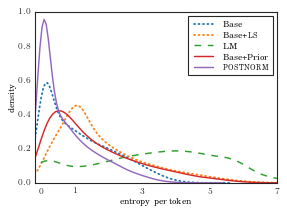

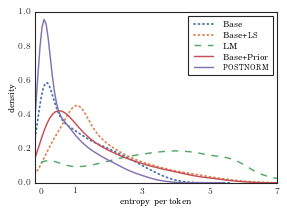

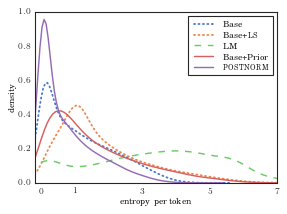

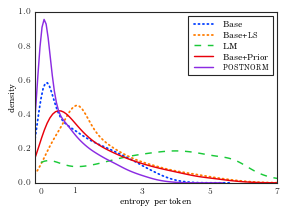

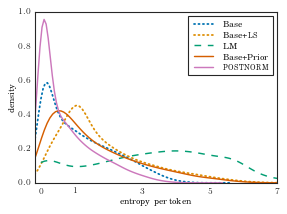

<Figure size 291.023x217.334 with 0 Axes>

In [113]:
learnui = ["#003f5c", "#58508d", "#bc5090", "#ff6361", "#ffa600"]
bw = 0.22
for p in ["tab10", "deep", "muted", "bright", "colorblind"]:
    sns.set_palette(p)
    sns.distplot(base["tm"],  label="Base",                 bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.6, "bw":bw, 'linestyle':':', 'dash_capstyle':'round', } )
    sns.distplot(base_ls["tm"],    label=r"Base+\textsc{ls}",    bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.6, "bw":bw, 'linestyle':':', 'dash_capstyle':'round', }  )
    sns.distplot(prior_30M["lm"],     label="LM",                   bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'--', })
#     sns.distplot(prior_30M["tm"],     label="Base+Prior",           bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'-', 'dash_capstyle':'round', } )
#     sns.distplot(rprior_30M["tm"],     label="Base+RPrior",           bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'-', 'dash_capstyle':'round', } )
#     sns.distplot(postnorm["tm"],  label=r"\textsc{postnorm}",   bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'-', 'dash_capstyle':'round', } )
    plt.ylabel("density",labelpad=2)
    plt.xlabel("entropy per token",labelpad=2)
    plt.xlim(-0.2, 7)
    plt.ylim(0,1)
    
    ax = plt.gca()
    ax.set_xticks([0, 1, 3, 5 ,7])
    ax.ticklabel_format(useOffset=False)
    plt.legend(ncol=1, prop={'weight':'bold'})
    plt.tight_layout()

    plt.savefig(f'entropy_{p}.pdf', bbox_inches='tight', format="pdf",pad_inches = 0)

    sns.distplot(prior_30M["tm"],     label=r"Base+Prior",bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'-', 'dash_capstyle':'round', } )
    plt.savefig(f'entropy_{p}_prior.pdf', bbox_inches='tight', format="pdf",pad_inches = 0)

    sns.distplot(postnorm["tm"],  label=r"\textsc{postnorm}",bins=bins, hist=False, kde_kws={"shade": False, "lw": 1.3, "bw":bw, 'linestyle':'-', 'dash_capstyle':'round', } )
    plt.savefig(f'entropy_{p}_postnorm.pdf', bbox_inches='tight', format="pdf",pad_inches = 0)
#     plt.savefig(f'entropy_{p}.svg', bbox_inches='tight', format="svg",pad_inches = 0)
    
    plt.show()
    plt.clf()

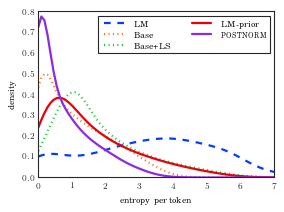

In [114]:
from scipy.stats import gaussian_kde
xs = np.linspace(0,9,100)
kde = lambda x: gaussian_kde(x, bw_method=0.3)(xs)
props = dict(linewidth=2)

sns.set_palette("bright")

nice_fonts = {
        # Use LaTeX to write all text
        "text.usetex": True,
        "font.family": "serif",
        # Use 10pt font in plots, to match 10pt font in document
        "axes.labelsize": 8,
        "font.size": 8,
        # Make the legend/label fonts a little smaller
        "legend.fontsize": 8,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
}

plt.rcParams.update(nice_fonts)

# fig, ax = plt.subplots()
fig_width_pt = 219.08612
figsize = set_size(fig_width_pt)
figsize = (figsize[0]*1.4, figsize[1]*1.6)
figsize = (4.*0.9, 3.*0.9)
fig, ax = plt.subplots(1, 1, figsize=figsize)

ax.plot(xs, kde(prior_3M["lm"]),  label="LM",       linestyle='--', **props)
ax.plot(xs, kde(base["tm"]),      label="Base",     linestyle=':', **props)
ax.plot(xs, kde(base_ls["tm"]),   label=r"Base+\textsc{LS}",  linestyle=':', **props)
ax.plot(xs, kde(prior_3M["tm"]),  label=r"\textsc{LM}-prior",    linestyle="-", **props)
ax.plot(xs, kde(postnorm["tm"]),  label=r"\textsc{postnorm}", linestyle='-', **props)


ax.set_xlabel("entropy per token")
ax.set_ylabel("density")
plt.legend(ncol=2, prop={'weight':'bold'})

plt.xlim(0, 7)
plt.ylim(0, 0.8)
fig.tight_layout()

plt.savefig('entropy.pdf', bbox_inches='tight', format="pdf")
plt.show()